In [1]:
import numpy as np

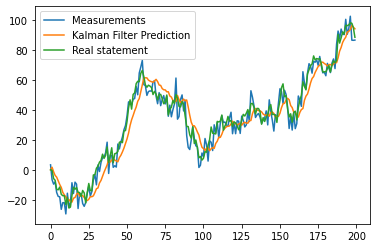

In [7]:
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0

    def predict(self, u = 0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(I - np.dot(K, self.H), self.P)

def example():
    dt = 1.0/60
    F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
    H = np.array([1, 0, 0]).reshape(1, 3)
    Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
    R = np.array([1]).reshape(1, 1)
    
    itr  = 200
    
    def f(x):
        return np.dot(F,x)+np.random.normal(0,5,3)
    
    real_state = []
    x = np.array([0,0,0])
    
    for i in range(itr):
        real_state.append(x[0])
        x = f(x)
    
    measurements = [x-1+5*np.random.normal(0,1) for x in real_state]

    kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
    predictions = []
    for z in measurements:
        predictions.append(kf.predict()[0])
        kf.update(z)

    import matplotlib.pyplot as plt
    plt.plot(range(len(measurements)), measurements, label = 'Measurements')
    plt.plot(range(len(predictions)), np.array(predictions), label = 'Kalman Filter Prediction')
    plt.plot(range(len(real_state)), real_state, label = 'Real statement' )
    plt.legend()
    plt.show()

if __name__ == '__main__':
    example()

In [ ]:

dt = 1/50
F = [1,dt,0; 0,1,dt;0,0,1];
H = [1,0,0];
Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
R = np.array([1]).reshape(1, 1)


